In [1]:
from atl_module import GebcoUpscaler
# from atl_module import ocean_color
# from atl_module import error_calc
# from atl_module.ocean_color import add_secchi_depth_to_tracklines

In [2]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [12]:
site = GebcoUpscaler("../data/test_sites/oahu",
                     '../data/test_sites/oahu/in-situ-DEM/truth.vrt'
                    )
# site.get_tracklines_geom()

In [13]:
import pandas as pd
site.tracklines  = site.tracklines.assign(date = pd.to_datetime(site.tracklines.date).dt.date).reset_index().set_index(['date','beam'])


In [9]:
site.subset_gebco(hres=50)

[D 220722 14:25:53 raster_interaction:119] GEBCO subset raster written to ../data/test_sites/oahu/bilinear.tif, with CRS EPSG:32604


In [10]:
# site.find_bathy_from_icesat(
#     window=200,
#     threshold_val=0.0,
#     req_perc_hconf=0,
#     window_meters=None,
#     min_photons=None,
# )

[I 220722 14:25:54 core:82] Starting bathymetry signal finding with parameters:
[I 220722 14:25:54 core:83] {'window_size_photons': 200, 'threshhold value': 0.0, 'Required percentage high confidence ocean photons': 0, 'minimum photons in distance window': None, 'window_horizontal': None}


KeyboardInterrupt: 

In [ ]:
# site.kriging(npts=2000)

[I 220720 17:18:49 core:110] Kriging using 2000 points with crs epsg:32617
[D 220720 17:19:21 kriging:26] 2000 points remaining after relaxation dart throwing culling
[D 220720 17:19:21 kriging:37] 2000 Points written to output LAZ and geopackage files


Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 9.92045672757883
Full Sill: 10.25219629713992
Range: 34271.506297566135
Nugget: 0.331739569561089 

Calculating statistics on variogram model fit...


In [14]:
site.add_truth_data()

[I 220722 14:26:45 core:139] Truth data added to Bathymetric Points dataframe


In [15]:
# site.kalman(1.5)
site.lidar_rmse()
# site.raster_rmse()

[I 220722 14:27:34 core:131] RMSE btween icesat and truth 555.7465997757755


In [16]:
df = site.bathy_pts_gdf.eval('error=abs(z_kde-tide_ocean_corr-true_elevation)').groupby([site.bathy_pts_gdf.rename(columns={'delta_time':'date'}).date.dt.date,'beam']).mean()
# df.sort_values('error',ascending=False)
df.error.pow(2).mean()**0.5

23.063949769930105

In [17]:
site.tracklines.secchi_depth

date        beam
2018-10-16  gt1r    35.707355
            gt2r    36.124050
            gt3r    36.391811
2018-11-07  gt1l    15.512530
            gt1r    15.512530
                      ...    
2022-01-09  gt3r          NaN
2022-04-02  gt2l          NaN
            gt2r          NaN
            gt3l          NaN
            gt3r          NaN
Name: secchi_depth, Length: 202, dtype: float64

In [18]:
df

X          Y     Z_ellip     Z_geoid  geoid_corr  \
date       beam                                                              
2018-11-07 gt1l -157.682302  21.366422 -113.140621 -129.031910   15.725544   
           gt1r -157.682976  21.361211 -108.570891 -124.475050   15.738049   
           gt2r -157.646784  21.324872 -108.787823 -124.444438   15.486452   
2019-01-07 gt3l -157.889536  21.596803    4.451736  -10.025323   14.572023   
2019-01-15 gt1l -157.834294  21.516209   13.894988   -1.592599   15.322932   
...                     ...        ...         ...         ...         ...   
2022-01-01 gt1r -157.819256  21.517570    3.621844  -11.630178   15.202754   
2022-01-09 gt1l -157.778983  21.458061   10.894583   -4.888987   15.747430   
           gt1r -157.780712  21.450153   14.976436   -0.907146   15.847406   
           gt3l -157.839517  21.471449    9.809662   -6.097793   15.871139   
           gt3r -157.840491  21.470031    4.289110  -11.634462   15.887244   

                 tide_ocean_corr  geof2m_corr  oc_sig_conf  land_sig_conf  \
date       beam                                                             
2018-11-07 gt1l         0.110643     0.077624     0.496513       0.469317   
           gt1r         0.110889     0.077647     0.704382       1.049520   
           gt2r         0.114003     0.077814     0.122449       0.034014   
2019-01-07 gt3l        -0.082443     0.076569     1.143434       1.565657   
2019-01-15 gt1l         0.148816     0.076938     3.669023       3.981289   
...                          ...          ...          ...            ...   
2022-01-01 gt1r        -0.013919     0.076932     0.749392       0.805353   
2022-01-09 gt1l        -0.007315     0.077204     0.956113       3.670846   
           gt1r        -0.007251     0.077240     1.000000       4.000000   
           gt3l        -0.007094     0.077143     0.818182       3.204545   
           gt3r        -0.007078     0.077149     0.680000       2.400000   

                 p_vec_az  ...  gebco_elev  sea_level_interp      Z_refr  \
date       beam            ...                                             
2018-11-07 gt1l  2.584551  ...  -15.513947       -110.990995 -124.455988   
           gt1r  2.532580  ...  -13.215186       -111.282361 -121.127738   
           gt2r  2.667806  ...  -38.346939       -111.063246 -121.048586   
2019-01-07 gt3l  2.825862  ...   -2.515152          0.845032   -7.279603   
2019-01-15 gt1l  0.261060  ...   -1.871933          0.436796   -1.079827   
...                   ...  ...         ...               ...         ...   
2022-01-01 gt1r  1.136478  ...   -6.834550          0.534963   -8.538420   
2022-01-09 gt1l -1.177533  ...   -3.231975          0.776227   -3.449182   
           gt1r -1.816667  ...   -4.000000          0.763357   -0.482591   
           gt3l  1.203729  ...   -1.579545          0.760704   -4.354685   
           gt3r  2.035938  ...   -1.440000          0.770187   -8.481779   

                 easting_corr  northing_corr       z_kde   kde_val  \
date       beam                                                      
2018-11-07 gt1l      0.237169      -0.380652 -122.039865  0.049185   
           gt1r      0.172031      -0.246337 -118.428749  0.080247   
           gt2r      0.130286      -0.254101 -117.972818  0.052543   
2019-01-07 gt3l      0.146092      -0.447223   -2.177058  0.085510   
2019-01-15 gt1l      0.022048       0.082537   -0.822019  0.697312   
...                       ...            ...         ...       ...   
2022-01-01 gt1r      0.040964       0.019001   -4.618498  0.075414   
2022-01-09 gt1l     -0.019995       0.008295   -2.412335  0.195529   
           gt1r     -0.006137      -0.001540   -2.039447  0.085365   
           gt3l      0.019019       0.007312   -0.820756  0.101121   
           gt3r      0.032534      -0.016328   -1.267568  0.080659   

                 oc_hconf_perc  true_elevation       error  
date       beam                                 

In [19]:
df = df.merge(site.tracklines.secchi_depth,how='left',left_index=True,right_index=True)
df

X          Y     Z_ellip     Z_geoid  geoid_corr  \
date       beam                                                              
2018-11-07 gt1l -157.682302  21.366422 -113.140621 -129.031910   15.725544   
           gt1r -157.682976  21.361211 -108.570891 -124.475050   15.738049   
           gt2r -157.646784  21.324872 -108.787823 -124.444438   15.486452   
2019-01-07 gt3l -157.889536  21.596803    4.451736  -10.025323   14.572023   
2019-01-15 gt1l -157.834294  21.516209   13.894988   -1.592599   15.322932   
...                     ...        ...         ...         ...         ...   
2022-01-01 gt1r -157.819256  21.517570    3.621844  -11.630178   15.202754   
2022-01-09 gt1l -157.778983  21.458061   10.894583   -4.888987   15.747430   
           gt1r -157.780712  21.450153   14.976436   -0.907146   15.847406   
           gt3l -157.839517  21.471449    9.809662   -6.097793   15.871139   
           gt3r -157.840491  21.470031    4.289110  -11.634462   15.887244   

                 tide_ocean_corr  geof2m_corr  oc_sig_conf  land_sig_conf  \
date       beam                                                             
2018-11-07 gt1l         0.110643     0.077624     0.496513       0.469317   
           gt1r         0.110889     0.077647     0.704382       1.049520   
           gt2r         0.114003     0.077814     0.122449       0.034014   
2019-01-07 gt3l        -0.082443     0.076569     1.143434       1.565657   
2019-01-15 gt1l         0.148816     0.076938     3.669023       3.981289   
...                          ...          ...          ...            ...   
2022-01-01 gt1r        -0.013919     0.076932     0.749392       0.805353   
2022-01-09 gt1l        -0.007315     0.077204     0.956113       3.670846   
           gt1r        -0.007251     0.077240     1.000000       4.000000   
           gt3l        -0.007094     0.077143     0.818182       3.204545   
           gt3r        -0.007078     0.077149     0.680000       2.400000   

                 p_vec_az  ...  sea_level_interp      Z_refr  easting_corr  \
date       beam            ...                                               
2018-11-07 gt1l  2.584551  ...       -110.990995 -124.455988      0.237169   
           gt1r  2.532580  ...       -111.282361 -121.127738      0.172031   
           gt2r  2.667806  ...       -111.063246 -121.048586      0.130286   
2019-01-07 gt3l  2.825862  ...          0.845032   -7.279603      0.146092   
2019-01-15 gt1l  0.261060  ...          0.436796   -1.079827      0.022048   
...                   ...  ...               ...         ...           ...   
2022-01-01 gt1r  1.136478  ...          0.534963   -8.538420      0.040964   
2022-01-09 gt1l -1.177533  ...          0.776227   -3.449182     -0.019995   
           gt1r -1.816667  ...          0.763357   -0.482591     -0.006137   
           gt3l  1.203729  ...          0.760704   -4.354685      0.019019   
           gt3r  2.035938  ...          0.770187   -8.481779      0.032534   

                 northing_corr       z_kde   kde_val  oc_hconf_perc  \
date       beam                                                       
2018-11-07 gt1l      -0.380652 -122.039865  0.049185       2.461168   
           gt1r      -0.246337 -118.428749  0.080247      68.050636   
           gt2r      -0.254101 -117.972818  0.052543      67.608030   
2019-01-07 gt3l      -0.447223   -2.177058  0.085510      24.969629   
2019-01-15 gt1l       0.082537   -0.822019  0.697312      96.328679   
...                        ...         ...       ...            ...   
2022-01-01 gt1r       0.019001   -4.618498  0.075414      38.139427   
2022-01-09 gt1l       0.008295   -2.412335  0.195529      97.732918   
           gt1r      -0.001540   -2.039447  0.085365      97.729265   
           gt3l       0.007312   -0.820756  0.101121      97.583474   
           gt3r      -0.016328   -1.267568  0.080659      97.450857   

                 true_elevation       error  secchi_depth  
date      

<AxesSubplot:xlabel='oc_sig_conf', ylabel='error'>

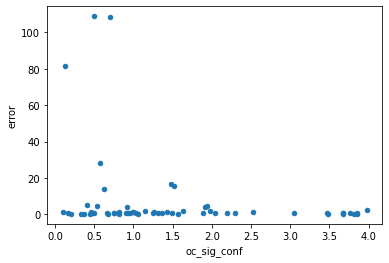

In [20]:
df.plot.scatter(y='error',x='oc_sig_conf')


<AxesSubplot:xlabel='oc_hconf_perc', ylabel='error'>

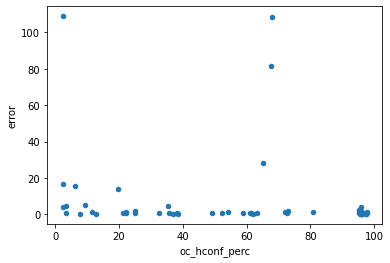

In [21]:
df.plot.scatter(y='error',x='oc_hconf_perc')

<AxesSubplot:xlabel='secchi_depth', ylabel='error'>

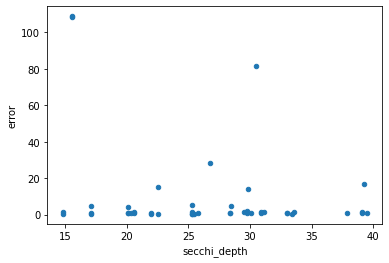

In [22]:
df.plot.scatter(y='error',x='secchi_depth')

<AxesSubplot:xlabel='tide_ocean_corr', ylabel='error'>

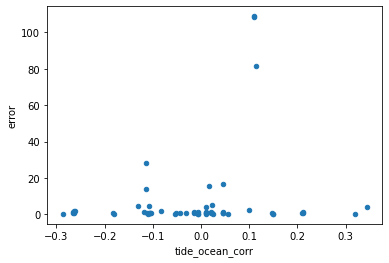

In [23]:
df.plot.scatter(y='error',x='tide_ocean_corr')

<AxesSubplot:xlabel='easting', ylabel='error'>

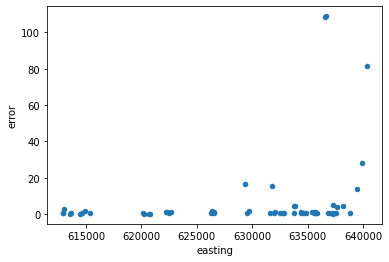

In [24]:
df.plot.scatter(y='error',x='easting')

<AxesSubplot:xlabel='dac_corr', ylabel='error'>

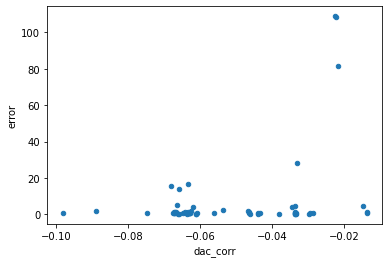

In [25]:
df.plot.scatter(y='error',x='dac_corr')

In [27]:
site.bathy_pts_gdf.eval('error=abs(z_kde-true_elevation)').corr()['error'].sort_values()

sea_level_interp   -0.975851
z_kde              -0.963185
Z_refr             -0.933226
Z_geoid            -0.902695
Z_ellip            -0.902206
gebco_elev         -0.333329
true_elevation     -0.301526
Y                  -0.214900
northing           -0.214787
northing_corr      -0.196346
dist_or            -0.157520
oc_sig_conf        -0.148801
land_sig_conf      -0.143931
kde_val            -0.112899
oc_hconf_perc      -0.016514
geoid_corr          0.038653
p_vec_elev          0.046334
easting_corr        0.075234
tide_ocean_corr     0.135608
geof2m_corr         0.215664
X                   0.220733
easting             0.220820
p_vec_az            0.305794
dac_corr            0.333239
error               1.000000
Name: error, dtype: float64

In [34]:
df.corr()['error'].sort_values()

Z_refr             -0.958664
Z_geoid            -0.954681
Z_ellip            -0.954644
sea_level_interp   -0.953285
z_kde              -0.944036
gebco_elev         -0.428244
true_elevation     -0.407894
land_sig_conf      -0.300079
Y                  -0.264598
northing           -0.264441
oc_sig_conf        -0.242771
northing_corr      -0.225267
dist_or            -0.201132
kde_val            -0.183894
oc_hconf_perc      -0.148680
secchi_depth        0.002132
easting_corr        0.044509
geoid_corr          0.076486
p_vec_elev          0.080797
tide_ocean_corr     0.207242
geof2m_corr         0.265160
p_vec_az            0.270153
X                   0.277322
easting             0.277360
dac_corr            0.362398
error               1.000000
Name: error, dtype: float64